# 테이블 조인

* 조인: 두 개의 테이블을 서로 묶어서 하나의 결과를 만들어 내는 것

## 내부 조인

* 보편적으로 그냥 조인이라 부르면 내부 조인을 의미한다.
* 두 테이블의 조인을 위해서는 테이블이 일대다(one to many)관계로 연결되어야 한다.
* **일대다 관계**: 한쪽 테이블에는 하나의 값만, 다른 쪽 테이블에는 여러 개의 값이 존재할 수 있는 관계
* 일대다 관계는 주로 기본 키(PK)와 외래 키(FK)관계로 이루어져 있다. 그래서 일대다 관계를 'PK-FK 관계'라고 부르기도 한다.
* 꼭 기본 키-외래 키 관계가 아니어도 가능한 조인이 있다. -> 상호 조인
* 상호 조인 외의 조인은 기본 키-외래 키 관계가 핵심 요소이다.

### 내부 조인의 기본

* SELECT <열 목록> FROM <첫 번째 테이블> INNER JOIN <두 번째 테이블> ON <조인될 조건> [WHERE 검색 조건];
* INNER JOIN을 그냥 JOIN이라고만 써도 INNER JOIN으로 인식한다.

In [ ]:
# 구매테이블에서 GRL이라는 아이디를 가진 사람이 구매한 물건을 발송하기 위해 조인해서 이름/주소/연락처 등을 검색
USE market_db;
SELECT * 
FROM buy INNER JOIN member
ON buy.mem_id = member.mem_id
WHERE buy.mem_id = 'GRL';

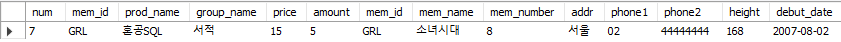

* 두 개의 테이블을 조인하는 경우 동일한 열 이름이 존재한다면 꼭 **테이블_이름.열_이름** 형식으로 표기해야 한다.

* WHERE buy.mem_id = 'GRL'를 생략했을 경우, 아래와 같이 1번째 BLK부터 12번째 MMU까지 구매 테이블의 모든 행이 회원 테이블과 결합하게 된다.

In [ ]:
# WHERE buy.mem_id = 'GRL'를 생략했을 경우
SELECT * 
FROM buy INNER JOIN member
ON buy.mem_id = member.mem_id;

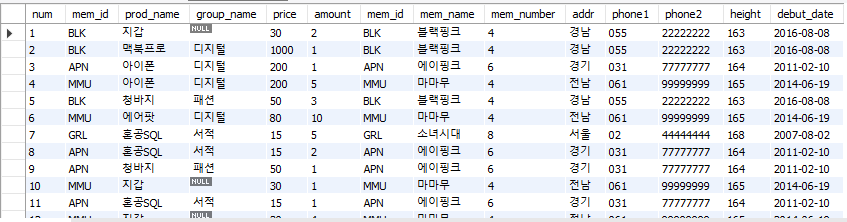

### 내부 조인의 간결한 표현

In [ ]:
# 필요한 아이디/이름/구매 물품/주소/연락처만 추출하기 -> 오류
SELECT mem_id, mem_name, prod_name, addr, CONCAT(phone1, pthone2) '연락처'
FROM buy
INNER JOIN member
ON buy.mem_id = member.mem_id;

* 열 이름인 mem_id가 불확실하다는 오류 메시지가 나타난다.
* 즉, 회원 아이디(mem_id)는 회원 테이블, 구매 테이블에 모두 들어 있어서 어느 테이블의 mem_id인지 헷갈린다는 의미
* 어느 테이블의 mem_id를 추출할지 정확하게 작성해야 한다. -> 지금은 구매 테이블을 기준으로 하는 것이므로 buy.mem_id가 논리적으로 더 맞을 것이다.

In [ ]:
# buy.mem_id로 수정한 명령어
SELECT buy.mem_id, mem_name, prod_name, addr, CONCAT(phone1, phone2) AS '연락처'
FROM buy
INNER JOIN member
ON buy.mem_id = member.mem_id;

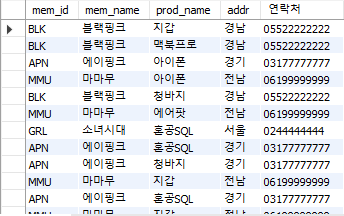

In [ ]:
# SELECT 다음의 열(컬럼 이름)에도 모두 테이블_이름.열_이름 형식으로 작성
SELECT buy.mem_id, member.mem_name, buy.prod_name, member.addr, CONCAT(member.phone1, member.phone2) '연락처'
FROM buy
INNER JOIN member
ON buy.mem_id = member.mem_id;

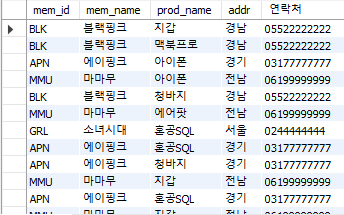

* 위의 경우, 각 열이 어느 테이블에 속한 것인지 명확해졌지만 코드가 너무 길어져서 오히려 복잡해 보인다.
* 이때 FROM절에 나오는 테이블 이름 뒤에 별칭을 사용할 수 있다.

In [ ]:
# 별칭을 사용한 구문
SELECT B.mem_id, M.mem_name, B.prod_name, M.addr, CONCAT(M.phone1, M.phone2) '연락처'
# 테이블 이름에 별칭을 붙여준다
FROM buy B
INNER JOIN member M
ON B.mem_id = M.mem_id;

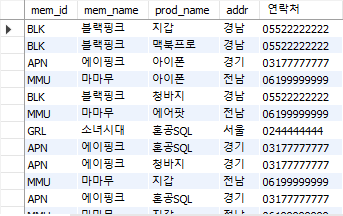

### 내부 조인의 활용

* 전체 회원의 아이디/이름/구매한 제품/주소를 출력하고자 한다.

In [ ]:
# 전체 회원의 아이디/이름/구매한 제품/주소 출력
SELECT M.mem_id, M.mem_name, B.prod_name, M.addr
FROM buy B
INNER JOIN member M
ON B.mem_id = M.mem_id
ORDER BY M.mem_id;

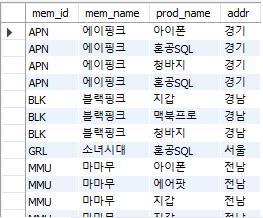

* 구매 테이블의 목록이 12건이었으므로 이상 없이 잘 나왔다.
* 결과는 아무런 이상이 없지만, 앞서 언급한 '전체 회원'과는 차이가 있다.
* '전체 회원'이 아닌 '구매한 기록이 있는 회원들'의 목록이다.
* 결과에 한 번도 구매하지 않은 회원의 정보는 없다. 우리가 원하는 결과는 구매한 회원의 구매 기록과 더불어 구매하지 않은 회원의 이름/주소가 같이 검색되도록 하는 것
* 내부 조인은 두 테이블에 모두 있는 내용만 조인되는 방식임
* 양쪽 중에 한곳이라도 내용이 있을 때 조인하려면 외부 조인을 사용해야 한다.

### 중복된 결과 1개만 출력하기

* 내부 조인이 양쪽에 모두 있는 내용만 나오기 때문에 유용한 경우가 있다.
* 예를 들어, 인터넷 마켓 운영자라면 '우리 사이트에서 한 번이라도 구매한 기록이 있는 회원들에게 감사의 안내문을 발송합시다.'를 진행하고자 하면 앞의 SQL처럼 내부 조인을 사용해서 추출한 회원에게만 안내문을 발송하면 된다.
* 중복된 이름은 필요없으므로 DISTINCT문을 활용

In [ ]:
# DISTINCT문을 활용한 구문
SELECT DISTINCT M.mem_id, M.mem_name, M.addr
FROM buy B
INNER JOIN member M
ON B.mem_id = M.mem_id
ORDER BY M.mem_id;

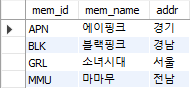

* 위와 같이 원하는 결과인 우리 사이트에서 구매한 기록이 있는 회원만 도출된다. 따라서 이 4명에게 안내문을 발송하면 된다.

## 외부 조인

* 내부 조인은 두 테이블에 모두 데이터가 있어야만 결과가 나왔는데, 이와 달리 외부 조인은 한쪽에만 데이터가 있어도 결과가 나온다.

### 외부 조인의 기본

* 두 테이블을 조인할 때 필요한 내용이 한쪽 테이블에만 있어도 결과를 추출할 수 있다.
* SELECT <열 목록> FROM <첫 번째 테이블(LEFT 테이블)> <LEFT | RIGHT | FULL> OUTER JOIN <두 번째 테이블(RIGHT 테이블)> ON <조인될 조건> [WHERE 검색 조건];
* **LEFT OUTER JOIN**: 왼쪽 테이블의 내용은 모두 출력된다.
* **RIGHT OUTER JOIN**: 오른쪽 테이블의 내용은 모두 출력된다.
* **FULL OUTER JOIN**: 왼쪽 외부 조인과 오른쪽 외부 조인이 합쳐진 것

In [ ]:
# 외부 조인을 이용하여 전체 회원의 구매 기록을 만들기
SELECT M.mem_id, M.mem_name, B.prod_name, M.addr
# 왼쪽에 있는 회원 테이블을 기준으로 외부 조인한다
FROM member M
LEFT OUTER JOIN buy B
ON M.mem_id = B.mem_id
ORDER BY M.mem_id;

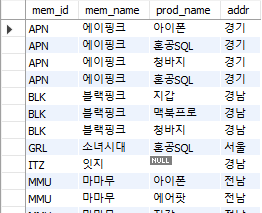

In [ ]:
# RIGHT OUTER JOIN으로 동일하게 출력
SELECT M.mem_id, M.mem_name, B.prod_name, M.addr
# 오른쪽에 있는 회원 테이블을 기준으로 외부 조인한다
FROM buy B
LEFT OUTER JOIN member M
ON M.mem_id = B.mem_id
ORDER BY M.mem_id;

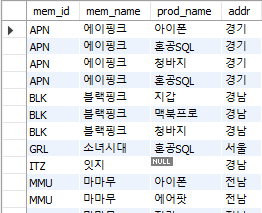

### 외부 조인의 활용

* 회원에게 가입만 하고, 한 번도 구매한 적이 없는 회원의 목록을 추출해본다.
* 한 번도 구매하지 않았으므로 조인된 결과의 물건이름이 비어있을 것이다.
* IS NULL구문은 널(NULL)값인지 비교한다.

In [ ]:
# 회원에게 가입만 하고, 한 번도 구매한 적이 없는 회원의 목록을 추출
SELECT DISTINCT M.mem_id, M.mem_name, B.prod_name, M.addr
FROM member M
LEFT OUTER JOIN buy B
ON M.mem_id = B.mem_id
WHERE B.prod_name IS NULL
ORDER BY M.mem_id;

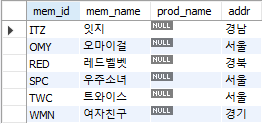

* 결과를 보면, 한 번도 구매하지 않은 6명의 회원이 도출되었다.

## 기타 조인

* 내부 조인이나 외부 조인처럼 자주 사용되지는 않지만, 가끔 유용하게 사용되는 조인으로 상호 조인과 자체 조인도 있다.

### 상호 조인

* 한쪽 테이블의 모든 행과 다른 쪽 테이블의 모든 행을 조인시키는 기능
* 상호 조인 결과의 전체 행 개수 = 두 테이블의 각 행의 개수를 곱한 개수

In [ ]:
# 회원 테이블과 구매 테이블 상호 조인
SELECT *
FROM buy
CROSS JOIN member;

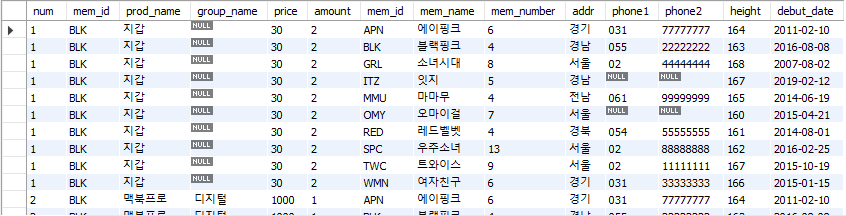

### 상호 조인의 특징

* ON 구문을 사용할 수 없다.
* 랜덤으로 조인하기 때문에, 결과의 내용은 의미가 없다.
* 상호 조인의 주 용도는 테스트하기 위해 대용량의 테이블을 생성할 때이다.

In [ ]:
# 샘플데이터를 이용하여 상호 조인
SELECT COUNT(*) '데이터 개수'
FROM sakila.inventory
CROSS JOIN world.city;

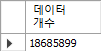

* 대용량의 테이블을 만들고 싶을 경우, CREATE TABLE ~ SELECT문을 사용한다.

In [ ]:
# CREATE TABLE ~ SELECT문을 사용하여 대용량 테이블 생성
CREATE TABLE cross_table
SELECT *
FROM sakila.actor
CROSS JOIN world.country;
SELECT * FROM cross_table LIMIT 5;

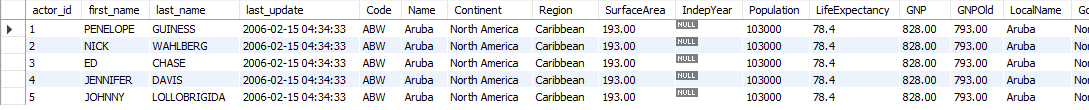

### 자체 조인

* 자체 조인은 자기 자신과 조인한다는 의미
* 1개의 테이블을 사용한다.
* 별도의 문법이 존재하는 것은 아니고 1개로 조인하면 자체 조인이 된다.
* SELECT <열 목록> FROM <테이블> 별칭A INNER JOIN <테이블> 별칭B ON <조인될 조건> [WHERE 검색 조건]
* 즉, 자체 조인은 하나의 테이블에 서로 다른 별칭을 붙여서 조인하는 것이다.

In [ ]:
# 자체 조인을 위한 emp_table테이블 생성
CREATE TABLE emp_table (emp CHAR(4), manager CHAR(4), phone VARCHAR(8));
INSERT INTO emp_table VALUES ('대표', 'NULL', '0000');
INSERT INTO emp_table VALUES ('영업이사', '대표', '1111');
INSERT INTO emp_table VALUES ('관리이사', '대표', '2222');
INSERT INTO emp_table VALUES ('정보이사', '대표', '3333');
INSERT INTO emp_table VALUES ('영업과장', '영업이사', '1111-1');
INSERT INTO emp_table VALUES ('경리부장', '관리이사', '2222-1');
INSERT INTO emp_table VALUES ('인사부장', '관리이사', '2222-2');
INSERT INTO emp_table VALUES ('개발팀장', '정보이사', '3333-1');
INSERT INTO emp_table VALUES ('대표', '정보이사', '3333-1-1');

* 경리부장 직속상관 연락처를 조회하고 싶다면 다음과 같이 조인을 할 수 있다.
* emp_table을 emp_table A, emp_table_B로 별칭을 사용하여 각각 별개의 테이블처럼 사용

In [ ]:
# 경리부장 직속상관 연락처 조회
SELECT A.emp "직원", B.emp "직속상관", B.phone "직속상관연락처"
FROM emp_table A
INNER JOIN emp_table B
ON A.manager = B.emp
WHERE A.emp = '경리부장';

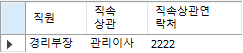